# A simple classification using k-NN

In [1]:
#Import Required modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#To load the graph in notebook
%matplotlib inline  

In [10]:
#Load the fruits data set using pandas 
fruits = pd.read_table('C:/Users/vidush/Downloads/Applined ML with Python UM/fruit_data_with_colors.txt')

#creating dataframe 
df = pd.DataFrame(fruits)

In [11]:
#Print the first five datas in the fruits dataset
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [14]:
#Classify the main feature
df[['fruit_label','fruit_name']]

,fruit_label,fruit_name
0,1,apple
1,1,apple
2,1,apple
3,2,mandarin
4,2,mandarin
5,2,mandarin
6,2,mandarin
7,2,mandarin
8,1,apple
9,1,apple


In [15]:
#Print the shape of the dataset
np.shape(fruits)

(59, 7)

In [16]:
df['fruit_label'].unique()

array([1, 2, 3, 4], dtype=int64)

In [18]:
df['fruit_name'].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [21]:
lookup_fruit_name = list(zip(df['fruit_label'].unique(),df['fruit_name'].unique()))
lookup_fruit_name

[(1, 'apple'), (2, 'mandarin'), (3, 'orange'), (4, 'lemon')]

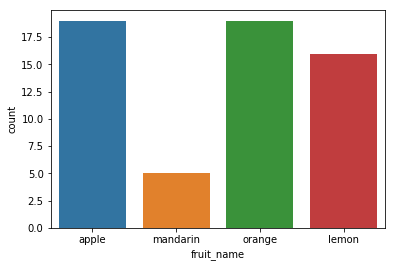

In [52]:
sns.countplot(x='fruit_name', data=fruits)

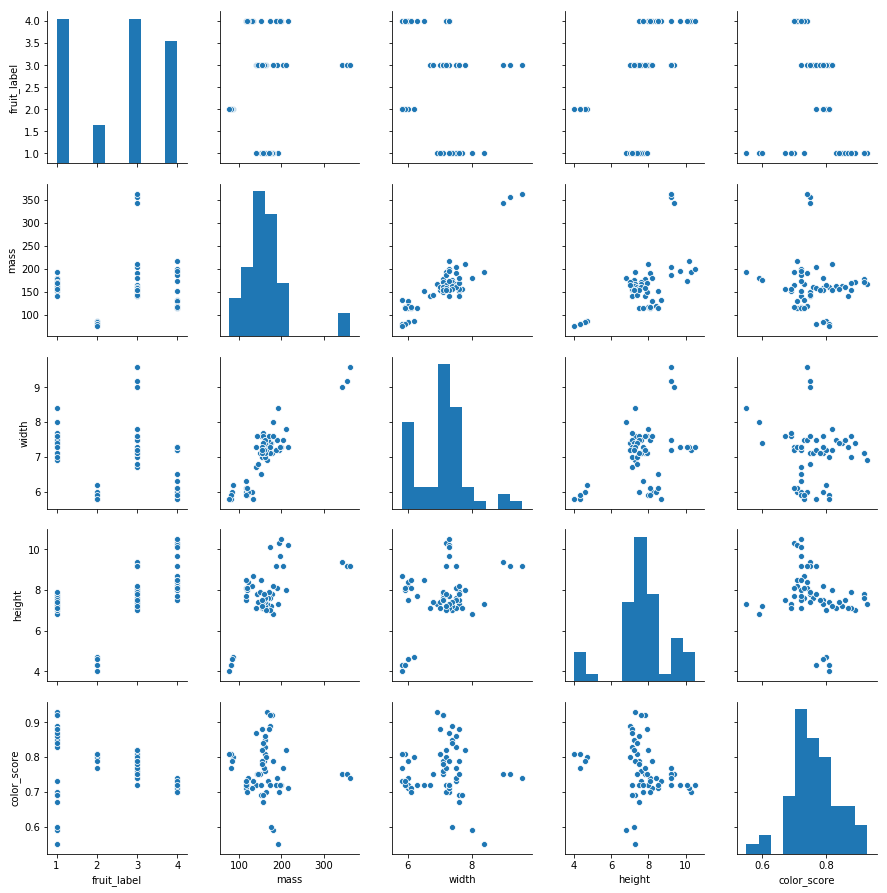

In [54]:
sns.pairplot(fruits)

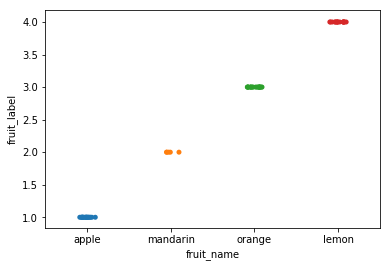

In [55]:
sns.stripplot(x='fruit_name', y='fruit_label',data=fruits)

In [30]:
#Create train-test split
X = fruits[['mass','width','height']]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [71]:
#Create classifier object
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)

In [72]:
#Train the classifier (fit the estimator) using the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [73]:
#Estimate the accuracy of the classifier on future data, using the test data
knn.score(X_test,y_test)

0.6

# Use the trained k-NN classifier model to classify new, previously unseen objects

In [74]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

(3, 'orange')

In [75]:
# second example: a larger, elongated fruit with mass 305g, width 2.3 cm, height 5.5 cm
fruit_prediction = knn.predict([[305, 2.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

(4, 'lemon')